In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = 12, 8

In [2]:
# численность
x_init = 0.1
y_init = 0.1

# коэф. собственной скорости роста вида
a1 = 1
a2 = 1.5

# взаимодействие видов
b1 = 0.2
b2 = 0.3

# самоограничение численности
c1 = 0.3
c2 = 0.5

# время
dt = 0.1
t_limit = 25

In [3]:
def x_der(x, y):
    return (a1 - b1 * y - c1 * x) * x


def y_der(x, y):
    return (a2 - b2 * x - c2 * y) * y

In [4]:
def runge_kutta4(x, y, t):
    k1x = x_der(x, y) * t
    k1y = y_der(x, y) * t
    k2x = x_der(x + k1x/2, y + k1y/2) * t
    k2y = y_der(x + k1x/2, y + k1y/2) * t
    k3x = x_der(x + k2x/2, y + k2y/2) * t
    k3y = y_der(x + k2x/2, y + k2y/2) * t
    k4x = x_der(x + k3x, y + k3y) * t
    k4y = y_der(x + k3x, y + k3y) * t
    return x + (k1x + 2*k2x + 2*k3x + k4x) / 6, y + (k1y + 2*k2y + 2*k3y + k4y) / 6

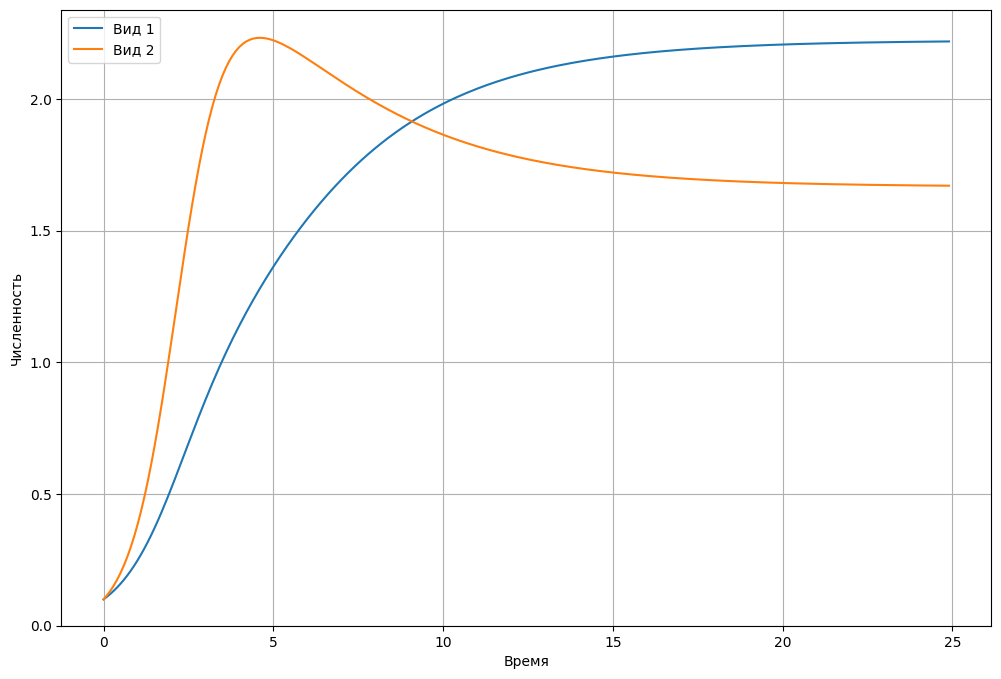

In [5]:
def solver(x_init, y_init):
    x_list = [x_init]
    y_list = [y_init]

    for i in range(num_of_iter - 1):
        temp = runge_kutta4(x_list[i], y_list[i], dt)
        x_list.append(temp[0])
        y_list.append(temp[1])
    return x_list, y_list

num_of_iter = int(t_limit / dt)
t_list = [i * dt for i in range(num_of_iter)]
result = solver(x_init, y_init)

plt.plot(t_list, result[0], label='Вид 1')
plt.plot(t_list, result[1], label='Вид 2')
plt.xlabel('Время')
plt.ylabel('Численность')
plt.grid()
plt.legend()
plt.gca().set_ylim(bottom=0)
plt.show()

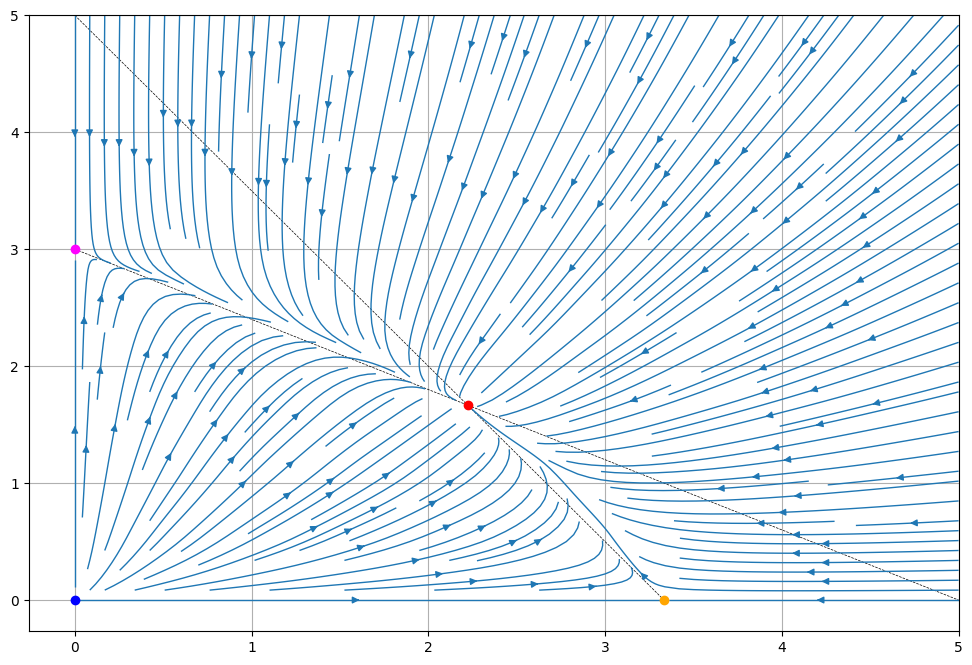

In [6]:
plt.plot([0, a1/c1], [a1/b1, 0], lw=0.5, color='black', linestyle='--')
plt.plot([0, a2/b2], [a2/c2, 0], lw=0.5, color='black', linestyle='--')

xls = np.linspace(0, 5, 10)
yls = np.linspace(0, 5, 10)
xmg, ymg = np.meshgrid(xls, yls)
xv = np.array(list(map(x_der, xmg, ymg)))
yv = np.array(list(map(y_der, xmg, ymg)))
plt.streamplot(xls, yls, xv, yv, density=2, linewidth=1)

plt.plot([0], [0], color='blue', marker='o')
plt.plot([0], [a2 / c2], color='magenta', marker='o')
plt.plot([a1 / c1], [0], color='orange', marker='o')
plt.plot([(a1*c2 - a2*b1) / (c1*c2 - b1*b2)], [(a2*c1 - a1*b2) / (c1*c2 - b1*b2)], color='red', marker='o')

plt.grid()
plt.show()